Import libraries

In [1]:
import pandas as pd
from itertools import takewhile
import plotly.graph_objects as go
import base64
import numpy as np
from dare_viz import path

ModuleNotFoundError: No module named 'dare_viz'

Read in Inventory CH4 data

In [4]:
xlsCH4 = pd.ExcelFile('GBR_2022_2020_10052022_142545.xlsx')
dfCH4 = pd.read_excel(xlsCH4, 'Table10s3', header=4)
dfCH4.set_index("GREENHOUSE GAS SOURCE AND SINK CATEGORIES", inplace=True)
dfCH4.dropna(inplace=True)

dfCH4.drop(
    labels = ["D.  Non-energy products from fuels and solvent use", "G.  Other product manufacture and use ", "C.  Rice cultivation", "D.  Agricultural soils", "E.  Prescribed burning of savannas", "F.  Other land", "E.  Other ","6.  Other (as specified in summary 1.A)", "International bunkers", "Navigation", "Multilateral operations",
 "Aviation"],
    axis=0,
    inplace = True
)
dfCH4.drop(
    labels = ["Base year(1)", "Change from base to latest reported year"],
    axis=1,
    inplace = True
)
#dfCH4

In [5]:
dfCH4_CO2_equ = dfCH4 / 1000 * 28
#dfCH4_CO2_equ

Read in Inventory N2O data

In [6]:
xlsN2O = pd.ExcelFile('GBR_2022_2020_10052022_142545.xlsx')
dfN2O = pd.read_excel(xlsN2O, 'Table10s4', header=4)
dfN2O.set_index("GREENHOUSE GAS SOURCE AND SINK CATEGORIES", inplace=True)
dfN2O.dropna(inplace=True)

dfN2O.drop(
    labels = ["D.  Non-energy products from fuels and solvent use",  "E.  Prescribed burning of savannas", "F.  Other land", "E.  Other ","6.  Other (as specified in summary 1.A)", "International bunkers", "Navigation", "Multilateral operations",
 "Aviation", "Indirect N2O", "H.  Other "],
    axis=0,
    inplace = True
)
dfN2O.drop(
    labels = ["Base year(1)", "Change from base to latest reported year"],
    axis=1,
    inplace = True
)
#dfN2O

In [7]:
dfN2O_CO2_equ = dfN2O / 1000 * 265
#dfN2O_CO2_equ

Read in Inventory F-gas data

In [8]:
invent_fgas = pd.read_csv(r'C:\Users\amar1\UNFCCC_data_local\2022\processed_data\totals_co2\UK_NIR_2022_co2e_all_gases_yearly.csv')
invent_fgas.set_index("year", inplace=True)
#invent_fgas

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\amar1\\UNFCCC_data_local\\2022\\processed_data\\totals_co2\\UK_NIR_2022_co2e_all_gases_yearly.csv'

In [41]:
invent_fgas_1 = invent_fgas / 1000
invent_fgas_1["Total"] = invent_fgas_1.sum(axis=1)
invent_fgas_1.index = pd.to_datetime(invent_fgas_1.index, format='%Y')
invent_fgas_1

,HFC-23,HFC-32,HFC-41,HFC-43-10mee,HFC-125,HFC-134,HFC-134a,HFC-143,HFC-143a,HFC-152,...,C5F12,C6F14,C10F18,c-C3F6,Unspecified mix of PFCs (1),Total PFCs,Unspecified mix of HFCs and PFCs(1),SF6,NF3,Total
year,,,,,,,,,,,,,,,,,,,,,
1990-01-01,14.391151,0.000012,NaN,NaN,0.000122,NaN,0.009218,NaN,0.000227,NaN,...,NaN,NaN,NaN,NaN,0.013450,NaN,NaN,1.200600,0.000117,17.250087
1991-01-01,14.984175,0.000013,NaN,NaN,0.000240,NaN,0.025425,NaN,0.000407,NaN,...,NaN,NaN,NaN,NaN,0.013455,NaN,NaN,1.258842,0.000139,17.650264
1992-01-01,15.577388,0.000016,NaN,NaN,0.000411,NaN,0.049774,NaN,0.000675,NaN,...,NaN,NaN,NaN,NaN,0.013525,NaN,NaN,1.322723,0.000165,17.636727
1993-01-01,16.170825,0.000033,NaN,NaN,0.000921,NaN,0.230140,NaN,0.001505,NaN,...,NaN,NaN,NaN,NaN,0.033583,NaN,NaN,1.156096,0.000195,18.157089
1994-01-01,16.764527,0.000249,NaN,NaN,0.006152,NaN,0.526931,NaN,0.009473,NaN,...,NaN,NaN,NaN,NaN,0.060449,NaN,NaN,1.200365,0.000231,19.113498
1995-01-01,17.654543,0.000441,NaN,NaN,0.027434,NaN,0.835121,NaN,0.048845,NaN,...,NaN,NaN,NaN,NaN,0.087315,NaN,NaN,1.245328,0.000274,20.404591
1996-01-01,18.071330,0.000746,NaN,NaN,0.075333,NaN,1.187400,NaN,0.135155,NaN,...,NaN,NaN,NaN,NaN,0.066996,NaN,NaN,1.290952,0.000324,21.363227
1997-01-01,19.702159,0.001173,NaN,NaN,0.159180,NaN,1.533395,NaN,0.275075,NaN,...,NaN,NaN,NaN,NaN,0.025966,NaN,NaN,1.265394,0.000384,23.470883
1998-01-01,15.254227,0.001851,NaN,NaN,0.279102,NaN,1.958111,NaN,0.476934,NaN,...,NaN,NaN,NaN,NaN,0.018000,NaN,NaN,1.313187,0.000442,19.846136


In [9]:
hfc23 = pd.read_csv(r'C:\Users\amar1\UNFCCC_data_local\2022\processed_data\species_specific\UK_NIR_2022_HFC-23.csv')
hfc23.set_index("GREENHOUSE GAS SOURCE AND SINK CATEGORIES", inplace=True)
hfc23.fillna(0, inplace=True)
#hfc23

hfc32 = pd.read_csv(r'C:\Users\amar1\UNFCCC_data_local\2022\processed_data\species_specific\UK_NIR_2022_HFC-32.csv')
hfc32.set_index("GREENHOUSE GAS SOURCE AND SINK CATEGORIES", inplace=True)
hfc32.fillna(0, inplace=True)
#hfc32

hfc4310mee = pd.read_csv(r'C:\Users\amar1\UNFCCC_data_local\2022\processed_data\species_specific\UK_NIR_2022_HFC-43-10mee.csv')
hfc4310mee.set_index("GREENHOUSE GAS SOURCE AND SINK CATEGORIES", inplace=True)
hfc4310mee.replace("NA,NO", 0, inplace=True)
#hfc4310mee.fillna(0, inplace=True)
#hfc4310mee

hfc125 = pd.read_csv(r'C:\Users\amar1\UNFCCC_data_local\2022\processed_data\species_specific\UK_NIR_2022_HFC-125.csv')
hfc125.set_index("GREENHOUSE GAS SOURCE AND SINK CATEGORIES", inplace=True)
#hfc125.replace("NA,NO", 0, inplace=True)
hfc125.fillna(0, inplace=True)
#hfc125

hfc134a = pd.read_csv(r'C:\Users\amar1\UNFCCC_data_local\2022\processed_data\species_specific\UK_NIR_2022_HFC-134a.csv')
hfc134a.set_index("GREENHOUSE GAS SOURCE AND SINK CATEGORIES", inplace=True)
#hfc134a.replace("NA,NO", 0, inplace=True)
hfc134a.fillna(0, inplace=True)
#hfc134a

hfc143a = pd.read_csv(r'C:\Users\amar1\UNFCCC_data_local\2022\processed_data\species_specific\UK_NIR_2022_HFC-143a.csv')
hfc143a.set_index("GREENHOUSE GAS SOURCE AND SINK CATEGORIES", inplace=True)
#hfc143a.replace("NA,NO", 0, inplace=True)
hfc143a.fillna(0, inplace=True)
#hfc143a

hfc152a = pd.read_csv(r'C:\Users\amar1\UNFCCC_data_local\2022\processed_data\species_specific\UK_NIR_2022_HFC-152a.csv')
hfc152a.set_index("GREENHOUSE GAS SOURCE AND SINK CATEGORIES", inplace=True)
#hfc152a.replace("NA,NO", 0, inplace=True)
hfc152a.fillna(0, inplace=True)
#hfc152a

hfc227ea = pd.read_csv(r'C:\Users\amar1\UNFCCC_data_local\2022\processed_data\species_specific\UK_NIR_2022_HFC-227ea.csv')
hfc227ea.set_index("GREENHOUSE GAS SOURCE AND SINK CATEGORIES", inplace=True)
#hfc227ea.replace("NA,NO", 0, inplace=True)
hfc227ea.fillna(0, inplace=True)
#hfc227ea

hfc245fa = pd.read_csv(r'C:\Users\amar1\UNFCCC_data_local\2022\processed_data\species_specific\UK_NIR_2022_HFC-245fa.csv')
hfc245fa.set_index("GREENHOUSE GAS SOURCE AND SINK CATEGORIES", inplace=True)
#hfc245fa.replace("NA,NO", 0, inplace=True)
hfc245fa.fillna(0, inplace=True)
#hfc245fa

hfc365mfc = pd.read_csv(r'C:\Users\amar1\UNFCCC_data_local\2022\processed_data\species_specific\UK_NIR_2022_HFC-365mfc.csv')
hfc365mfc.set_index("GREENHOUSE GAS SOURCE AND SINK CATEGORIES", inplace=True)
#hfc365mfc.replace("NA,NO", 0, inplace=True)
hfc365mfc.fillna(0, inplace=True)
#hfc365mfc

In [20]:
hfc23.loc["F.  Product uses as substitutes for ODS(2)"] / 1000 *12690# + (hfc32.loc["F.  Product uses as substitutes for ODS(2)"] / 1000 *705) + (hfc4310mee.loc["F.  Product uses as substitutes for ODS(2)"] / 1000 *1470) + (hfc125.loc["F.  Product uses as substitutes for ODS(2)"] / 1000 *3450) + (hfc134a.loc["F.  Product uses as substitutes for ODS(2)"] / 1000 *1360) + (hfc143a.loc["F.  Product uses as substitutes for ODS(2)"] / 1000 *5080) + (hfc152a.loc["F.  Product uses as substitutes for ODS(2)"] / 1000 *148) + (hfc227ea.loc["F.  Product uses as substitutes for ODS(2)"] / 1000 *3140) + (hfc245fa.loc["F.  Product uses as substitutes for ODS(2)"] / 1000 *880) + (hfc365mfc.loc["F.  Product uses as substitutes for ODS(2)"] / 1000 *810)

1990         0.0
1991         0.0
1992         0.0
1993         0.0
1994         0.0
1995         0.0
1996         0.0
1997         0.0
1998         0.0
1999         0.0
2000         0.0
2001         0.0
2002         0.0
2003         0.0
2004         0.0
2005         0.0
2006         0.0
2007         0.0
2008         0.0
2009         0.0
2010         0.0
2011         0.0
2012         0.0
2013         0.0
2014         0.0
2015         0.0
2016         0.0
2017    0.012827
2018     0.08987
2019    0.013735
2020    0.013735
Name: F.  Product uses as substitutes for ODS(2), dtype: object

In [42]:
test_ODS = (hfc23.loc["F.  Product uses as substitutes for ODS(2)"] / 1000 *14800) + (hfc32.loc["F.  Product uses as substitutes for ODS(2)"] / 1000 *675) + (hfc4310mee.loc["F.  Product uses as substitutes for ODS(2)"] / 1000 *1640) + (hfc125.loc["F.  Product uses as substitutes for ODS(2)"] / 1000 *3500) + (hfc134a.loc["F.  Product uses as substitutes for ODS(2)"] / 1000 *1430) + (hfc143a.loc["F.  Product uses as substitutes for ODS(2)"] / 1000 *4470) + (hfc152a.loc["F.  Product uses as substitutes for ODS(2)"] / 1000 *124) + (hfc227ea.loc["F.  Product uses as substitutes for ODS(2)"] / 1000 *3220) + (hfc245fa.loc["F.  Product uses as substitutes for ODS(2)"] / 1000 *1030) + (hfc365mfc.loc["F.  Product uses as substitutes for ODS(2)"] / 1000 *794)
test_ODS

df_test = pd.DataFrame(test_ODS)
df_test.set_index(pd.to_datetime(df_test.index, format='%Y'), inplace=True)

df_test["ODS"] = df_test["F.  Product uses as substitutes for ODS(2)"] / 1000
df_test["Total"] = invent_fgas_1["Total"]
df_test

,F. Product uses as substitutes for ODS(2),ODS,Total
1990-01-01,8.450338,0.00845,17.250087
1991-01-01,24.929921,0.02493,17.650264
1992-01-01,49.443112,0.049443,17.636727
1993-01-01,229.781404,0.229781,18.157089
1994-01-01,525.951423,0.525951,19.113498
1995-01-01,885.83011,0.88583,20.404591
1996-01-01,1373.35453,1.373355,21.363227
1997-01-01,1957.88449,1.957884,23.470883
1998-01-01,2736.285764,2.736286,19.846136
1999-01-01,3620.577553,3.620578,11.701532


In [22]:
test2 = pd.read_csv(r'C:\Users\amar1\UNFCCC_data_local\2022\processed_data\totals\UK_NIR_2022_all_gases_yearly.csv')
test2.set_index("year", inplace=True)
test2.set_index(pd.to_datetime(test2.index, format='%Y'), inplace=True)
test2["Total"] = test2.sum(axis=1)
test2

,HFC-23,HFC-32,HFC-41,HFC-43-10mee,HFC-125,HFC-134,HFC-134a,HFC-143,HFC-143a,HFC-152,...,C5F12,C6F14,C10F18,c-C3F6,Unspecified mix of PFCs (1),Total PFCs,Unspecified mix of HFCs and PFCs(1),SF6,NF3,Total
year,,,,,,,,,,,,,,,,,,,,,
1990-01-01,972.375045,0.018429,NaN,NaN,0.034744,NaN,6.446216,NaN,0.050695,NaN,...,NaN,NaN,NaN,NaN,13.449899,NaN,NaN,52.657903,0.006823,1248.644734
1991-01-01,1012.444240,0.018868,NaN,NaN,0.068673,NaN,17.779806,NaN,0.091022,NaN,...,NaN,NaN,NaN,NaN,13.454785,NaN,NaN,55.212352,0.008082,1268.683279
1992-01-01,1052.526203,0.023404,NaN,NaN,0.117453,NaN,34.806894,NaN,0.151042,NaN,...,NaN,NaN,NaN,NaN,13.524705,NaN,NaN,58.014174,0.009573,1240.984897
1993-01-01,1092.623287,0.049083,NaN,NaN,0.263212,NaN,160.936719,NaN,0.336726,NaN,...,NaN,NaN,NaN,NaN,33.582769,NaN,NaN,50.705986,0.011340,1407.628547
1994-01-01,1132.738283,0.368707,NaN,NaN,1.757633,NaN,368.483532,NaN,2.119240,NaN,...,NaN,NaN,NaN,NaN,60.448984,NaN,NaN,52.647570,0.013432,1687.693459
1995-01-01,1192.874497,0.653788,NaN,NaN,7.838418,NaN,584.000625,NaN,10.927242,NaN,...,NaN,NaN,NaN,NaN,87.315199,NaN,NaN,54.619657,0.015910,2007.583336
1996-01-01,1221.035841,1.104540,NaN,NaN,21.523602,NaN,830.349687,NaN,30.236079,NaN,...,NaN,NaN,NaN,NaN,66.995919,NaN,NaN,56.620703,0.018845,2310.765493
1997-01-01,1331.226954,1.737479,NaN,NaN,45.480088,NaN,1072.304261,NaN,61.537973,NaN,...,NaN,NaN,NaN,NaN,25.965874,NaN,NaN,55.499739,0.022322,2699.375936
1998-01-01,1030.690997,2.742936,NaN,NaN,79.743406,NaN,1369.308514,NaN,106.696596,NaN,...,NaN,NaN,NaN,NaN,17.999608,NaN,NaN,57.595917,0.025670,2810.040317


In [23]:
test2["ODS"] = df_test["F.  Product uses as substitutes for ODS(2)"]
#test2
fgas_fraction = test2["ODS"] / test2["Total"]
fgas_fraction

year
1990-01-01    0.006768
1991-01-01     0.01965
1992-01-01    0.039842
1993-01-01     0.16324
1994-01-01    0.311639
1995-01-01    0.441242
1996-01-01    0.594329
1997-01-01     0.72531
1998-01-01    0.973753
1999-01-01    1.369321
2000-01-01    1.529414
2001-01-01    1.604554
2002-01-01    1.649503
2003-01-01    1.673539
2004-01-01    1.774237
2005-01-01    1.795849
2006-01-01    1.825778
2007-01-01     1.87366
2008-01-01     1.92606
2009-01-01    1.971062
2010-01-01    1.985016
2011-01-01    1.980165
2012-01-01    1.978866
2013-01-01    1.975581
2014-01-01    1.969089
2015-01-01    1.951189
2016-01-01    1.934773
2017-01-01    1.913974
2018-01-01    1.901166
2019-01-01    1.883096
2020-01-01    1.866199
dtype: object

Read in InTEM data

In [24]:
def read_intem(species):

    fname = path() / f"data/intem/Table_UK_2021_{species}.txt"

    with open(fname, "r") as f:
        headiter = takewhile(lambda s: s.startswith('#'), f)
        header = list(headiter)

    df = pd.read_csv(fname,
                    sep=",",
                    skipinitialspace=True,
                    index_col="Year",
                    comment="#")

    df = df.apply(pd.to_numeric, errors='ignore')
    df.index = pd.to_datetime(df.index, format='%Y')
    df.rename(columns = {"Invent2021": "Invent"}, inplace=True)

    for h in header:
        if "GAS" in h:
            species_str = h.split(":")[1].strip()
        if "UNITS" in h:
            species_units = h.split(":")[1].strip()
        if "GWP" in h:
            species_gwp = float(h.split(":")[1].strip())
    
    return df, species_str, species_units, species_gwp

In [25]:
df_ch4, _, _, _ = read_intem("ch4")
df_n2o, _, _, _ = read_intem("n2o")
#df_ch4

In [26]:
# Get F-gases
fgas = [f"hfc{hfc}" for hfc in ["23", "32", "125", "134a", "143a", "152a", "227ea", "245fa", "365mfc", "4310mee"]] + \
    [f"pfc{pfc}" for pfc in ["14", "116", "218", "318"]] + \
    ["sf6"]

df_fgas, _, _, _ = read_intem(fgas[0])

uncert = df_fgas["InTEM_std"]**2

for fg in fgas[1:]:
    dfs, _, _, _ = read_intem(fg)
    df_fgas += dfs
    uncert += df_fgas["InTEM_std"]**2

df_fgas["InTEM_std"] = np.sqrt(uncert.values)

In [45]:
df_fgas["InTEM_ODS"] = (df_test["ODS"] / df_test["Total"]) * df_fgas["InTEM"]
df_fgas["InTEM_ODS_std"] = (df_test["ODS"] / df_test["Total"]) * df_fgas["InTEM_std"]
df_fgas

,Invent,Invent_std,InTEM,InTEM_std,InTEM_ODS,InTEM_ODS_std
Year,,,,,,
1990-01-01,NaN,NaN,NaN,NaN,NaN,NaN
1991-01-01,NaN,NaN,NaN,NaN,NaN,NaN
1992-01-01,NaN,NaN,NaN,NaN,NaN,NaN
1993-01-01,NaN,NaN,NaN,NaN,NaN,NaN
1994-01-01,NaN,NaN,NaN,NaN,NaN,NaN
1995-01-01,NaN,NaN,NaN,NaN,NaN,NaN
1996-01-01,NaN,NaN,NaN,NaN,NaN,NaN
1997-01-01,NaN,NaN,NaN,NaN,NaN,NaN
1998-01-01,NaN,NaN,NaN,NaN,NaN,NaN


Break down InTEM emissions data by sector (CH4)

In [27]:
energy_ch4_fraction = pd.DataFrame(dfCH4_CO2_equ.loc["1. Energy"] / dfCH4_CO2_equ.loc["Total CH4 emissions with CH4 from LULUCF"], columns=["Energy_Fraction"])
energy_ch4_fraction.index = pd.to_datetime(energy_ch4_fraction.index, format='%Y')
#energy_n2o_fraction

industry_ch4_fraction = pd.DataFrame(dfCH4_CO2_equ.loc["2.  Industrial processes"] / dfCH4_CO2_equ.loc["Total CH4 emissions with CH4 from LULUCF"], columns=["Industry_Fraction"])
industry_ch4_fraction.index = pd.to_datetime(industry_ch4_fraction.index, format='%Y')
#industry_n2o_fraction

agri_ch4_fraction = pd.DataFrame(dfCH4_CO2_equ.loc["3.  Agriculture"] / dfCH4_CO2_equ.loc["Total CH4 emissions with CH4 from LULUCF"], columns=["Agri_Fraction"])
agri_ch4_fraction.index = pd.to_datetime(agri_ch4_fraction.index, format='%Y')
#agri_n2o_fraction

lulucf_ch4_fraction = pd.DataFrame(dfCH4_CO2_equ.loc["4. Land use, land-use change and forestry"] / dfCH4_CO2_equ.loc["Total CH4 emissions with CH4 from LULUCF"], columns=["LULUCF_Fraction"])
lulucf_ch4_fraction.index = pd.to_datetime(lulucf_ch4_fraction.index, format='%Y')
#lulucf_n2o_fraction

waste_ch4_fraction = pd.DataFrame(dfCH4_CO2_equ.loc["5.  Waste"] / dfCH4_CO2_equ.loc["Total CH4 emissions with CH4 from LULUCF"], columns=["Waste_Fraction"])
waste_ch4_fraction.index = pd.to_datetime(waste_ch4_fraction.index, format='%Y')
#waste_n2o_fraction

In [28]:
frames = [energy_ch4_fraction, industry_ch4_fraction, agri_ch4_fraction, lulucf_ch4_fraction, waste_ch4_fraction, df_ch4]
df_ch4_new = pd.concat(frames, axis=1).reindex(df_n2o.index)

df_ch4_new["InTEM_Energy"] = df_ch4_new["InTEM"] *df_ch4_new["Energy_Fraction"]
df_ch4_new["InTEM_Energy_std"] = df_ch4_new["InTEM_std"] *df_ch4_new["Energy_Fraction"]

df_ch4_new["InTEM_Industry"] = df_ch4_new["InTEM"] *df_ch4_new["Industry_Fraction"]
df_ch4_new["InTEM_Industry_std"] = df_ch4_new["InTEM_std"] *df_ch4_new["Industry_Fraction"]

df_ch4_new["InTEM_Agriculture"] = df_ch4_new["InTEM"] *df_ch4_new["Agri_Fraction"]
df_ch4_new["InTEM_Agriculture_std"] = df_ch4_new["InTEM_std"] *df_ch4_new["Agri_Fraction"]

df_ch4_new["InTEM_LULUCF"] = df_ch4_new["InTEM"] *df_ch4_new["LULUCF_Fraction"]
df_ch4_new["InTEM_LULUCF_std"] = df_ch4_new["InTEM_std"] *df_ch4_new["LULUCF_Fraction"]

df_ch4_new["InTEM_Waste"] = df_ch4_new["InTEM"] *df_ch4_new["Waste_Fraction"]
df_ch4_new["InTEM_Waste_std"] = df_ch4_new["InTEM_std"] *df_ch4_new["Waste_Fraction"]

#df_ch4_new

Break down InTEM emissions data by sector (N2O)

In [29]:
energy_n2o_fraction = pd.DataFrame(dfN2O_CO2_equ.loc["1. Energy"] / dfN2O_CO2_equ.loc["Total direct N2O emissions with N2O from LULUCF"], columns=["Energy_Fraction"])
energy_n2o_fraction.index = pd.to_datetime(energy_n2o_fraction.index, format='%Y')
#energy_n2o_fraction

industry_n2o_fraction = pd.DataFrame(dfN2O_CO2_equ.loc["2.  Industrial processes"] / dfN2O_CO2_equ.loc["Total direct N2O emissions with N2O from LULUCF"], columns=["Industry_Fraction"])
industry_n2o_fraction.index = pd.to_datetime(industry_n2o_fraction.index, format='%Y')
#industry_n2o_fraction

agri_n2o_fraction = pd.DataFrame(dfN2O_CO2_equ.loc["3.  Agriculture"] / dfN2O_CO2_equ.loc["Total direct N2O emissions with N2O from LULUCF"], columns=["Agri_Fraction"])
agri_n2o_fraction.index = pd.to_datetime(agri_n2o_fraction.index, format='%Y')
#agri_n2o_fraction

lulucf_n2o_fraction = pd.DataFrame(dfN2O_CO2_equ.loc["4. Land use, land-use change and forestry"] / dfN2O_CO2_equ.loc["Total direct N2O emissions with N2O from LULUCF"], columns=["LULUCF_Fraction"])
lulucf_n2o_fraction.index = pd.to_datetime(lulucf_n2o_fraction.index, format='%Y')
#lulucf_n2o_fraction

waste_n2o_fraction = pd.DataFrame(dfN2O_CO2_equ.loc["5.  Waste"] / dfN2O_CO2_equ.loc["Total direct N2O emissions with N2O from LULUCF"], columns=["Waste_Fraction"])
waste_n2o_fraction.index = pd.to_datetime(waste_n2o_fraction.index, format='%Y')
#waste_n2o_fraction

In [30]:
frames = [energy_n2o_fraction, industry_n2o_fraction, agri_n2o_fraction, lulucf_n2o_fraction, waste_n2o_fraction, df_n2o]
df_n2o_new = pd.concat(frames, axis=1).reindex(df_n2o.index)

df_n2o_new["InTEM_Energy"] = df_n2o_new["InTEM"] *df_n2o_new["Energy_Fraction"]
df_n2o_new["InTEM_Energy_std"] = df_n2o_new["InTEM_std"] *df_n2o_new["Energy_Fraction"]

df_n2o_new["InTEM_Industry"] = df_n2o_new["InTEM"] *df_n2o_new["Industry_Fraction"]
df_n2o_new["InTEM_Industry_std"] = df_n2o_new["InTEM_std"] *df_n2o_new["Industry_Fraction"]

df_n2o_new["InTEM_Agriculture"] = df_n2o_new["InTEM"] *df_n2o_new["Agri_Fraction"]
df_n2o_new["InTEM_Agriculture_std"] = df_n2o_new["InTEM_std"] *df_n2o_new["Agri_Fraction"]

df_n2o_new["InTEM_LULUCF"] = df_n2o_new["InTEM"] *df_n2o_new["LULUCF_Fraction"]
df_n2o_new["InTEM_LULUCF_std"] = df_n2o_new["InTEM_std"] *df_n2o_new["LULUCF_Fraction"]

df_n2o_new["InTEM_Waste"] = df_n2o_new["InTEM"] *df_n2o_new["Waste_Fraction"]
df_n2o_new["InTEM_Waste_std"] = df_n2o_new["InTEM_std"] *df_n2o_new["Waste_Fraction"]

#df_n2o_new

Sum of CH4 and N2O

In [31]:
energy_both = dfN2O_CO2_equ.loc["1. Energy"] + dfCH4_CO2_equ.loc["1. Energy"]
industrial_both = dfN2O_CO2_equ.loc["2.  Industrial processes"] + dfCH4_CO2_equ.loc["2.  Industrial processes"]
agricultural_both = dfN2O_CO2_equ.loc["3.  Agriculture"] + dfCH4_CO2_equ.loc["3.  Agriculture"]
LULUCF_both = dfN2O_CO2_equ.loc["4. Land use, land-use change and forestry"] + dfCH4_CO2_equ.loc["4. Land use, land-use change and forestry"]
waste_both = dfN2O_CO2_equ.loc["5.  Waste"] + dfCH4_CO2_equ.loc["5.  Waste"]

In [32]:
energy_both_intem = pd.DataFrame(df_n2o_new["InTEM_Energy"] + df_ch4_new["InTEM_Energy"], columns=["InTEM_Energy"])
energy_both_intem["InTEM_Energy_std"] = df_n2o_new["InTEM_Energy_std"] + df_ch4_new["InTEM_Energy_std"]
energy_both_intem.index = pd.to_datetime(energy_both_intem.index, format='%Y')
#energy_both_intem

industrial_both_intem = pd.DataFrame(df_n2o_new["InTEM_Industry"] + df_ch4_new["InTEM_Industry"], columns=["InTEM_Industry"])
industrial_both_intem["InTEM_Industry_std"] = df_n2o_new["InTEM_Industry_std"] + df_ch4_new["InTEM_Industry_std"]
industrial_both_intem.index = pd.to_datetime(industrial_both_intem.index, format='%Y')
#industrial_both_intem

agricultural_both_intem = pd.DataFrame(df_n2o_new["InTEM_Agriculture"] + df_ch4_new["InTEM_Agriculture"], columns=["InTEM_Agriculture"])
agricultural_both_intem["InTEM_Agriculture_std"] = df_n2o_new["InTEM_Agriculture_std"] + df_ch4_new["InTEM_Agriculture_std"]
agricultural_both_intem.index = pd.to_datetime(agricultural_both_intem.index, format='%Y')
#agricultural_both_intem

LULUCF_both_intem = pd.DataFrame(df_n2o_new["InTEM_LULUCF"] + df_ch4_new["InTEM_LULUCF"], columns=["InTEM_LULUCF"])
LULUCF_both_intem["InTEM_LULUCF_std"] = df_n2o_new["InTEM_LULUCF_std"] + df_ch4_new["InTEM_LULUCF_std"]
LULUCF_both_intem.index = pd.to_datetime(LULUCF_both_intem.index, format='%Y')
#LULUCF_both_intem

waste_both_intem = pd.DataFrame(df_n2o_new["InTEM_Waste"] + df_ch4_new["InTEM_Waste"], columns=["InTEM_Waste"])
waste_both_intem["InTEM_Waste_std"] = df_n2o_new["InTEM_Waste_std"] + df_ch4_new["InTEM_Waste_std"]
waste_both_intem.index = pd.to_datetime(waste_both_intem.index, format='%Y')
#waste_both_intem

Plot the graph

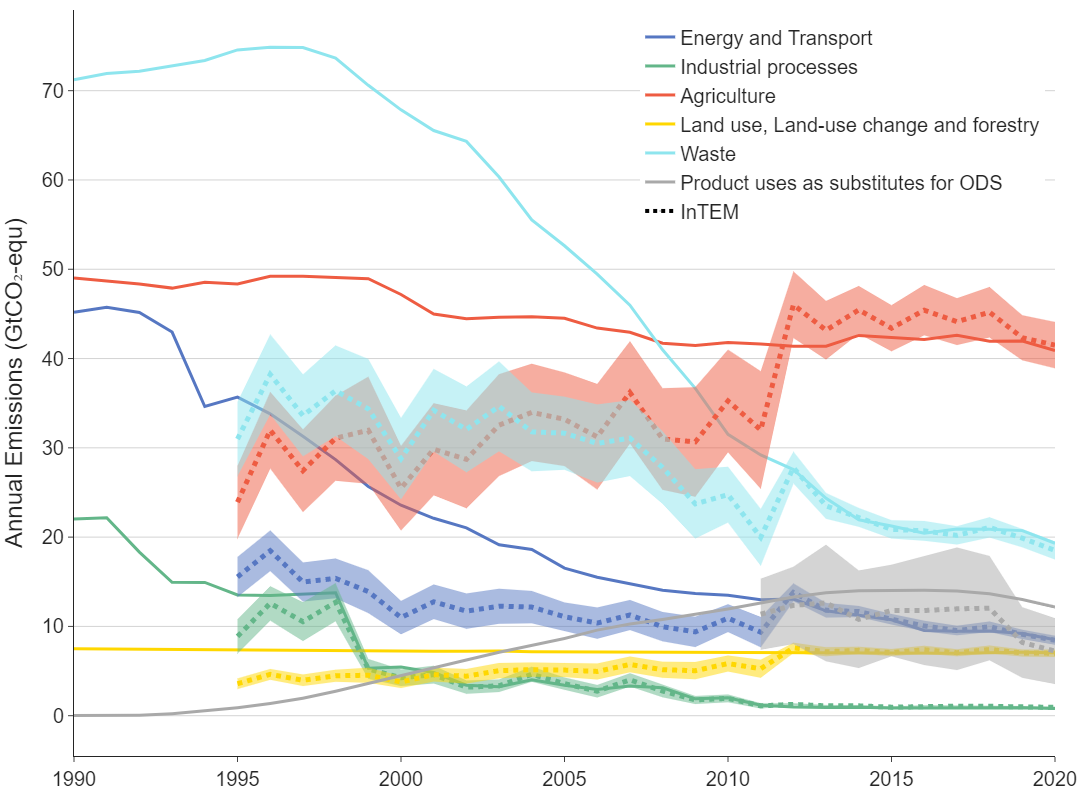

In [50]:
fig2 = go.Figure()

alpha = 0.6
color_1 = ["rgba(86, 119, 194, 1)", f"rgba(86, 119, 194, {alpha})"]
color_2 = ["rgba(99, 182, 137, 1)", f"rgba(99, 182, 137, {alpha})"]
color_3 = ["rgba(238,92,66, 1)", f"rgba(238,92,66, {alpha})"]
color_4 = ["rgba(255,215,0, 1)", f"rgba(255,215,0, {alpha})"]
color_5 = ["rgba(142,229,238, 1)", f"rgba(142,229,238, {alpha})"]
color_6 = ["rgba(169,169,169, 1)", f"rgba(169,169,169, {alpha})"]
color_7 = ["rgba(0, 0, 0, 1)", f"rgba(0, 0, 0, {alpha})"]

date_range = [1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
#date_range = ["2019-03-01", "2019-06-01"]

def errorbars(df, var, color, dash, name, showlegend=False):

    error_minus=df[var] - df[f"{var}_std"]
    error_plus=df[var] + df[f"{var}_std"]

    fig2.add_trace(go.Scatter(
        x=date_range,
        y=error_minus.values,
        fill=None,
        mode='lines',
        line=dict(color=color[1], width=0.1),
        showlegend=False,
        hoverinfo='skip'
        ))

    fig2.add_trace(go.Scatter(
        x=date_range,
        y=error_plus.values,
        fill="tonexty",
        mode='lines',
        line=dict(color=color[1], width=0.1),
        showlegend=False,
        hoverinfo='skip'
        ))
    
    fig2.add_trace(go.Scatter(
        x=date_range,
        y=df[var],
        mode="lines",
        line=dict(color=color[0], dash="dot", width = 0.1),
        showlegend=showlegend,
        name=name,
        hovertemplate = 'InTEM %{x|%Y}: %{y:.0f} Gt yr⁻¹<extra></extra>',
        ))

fig2.add_trace(go.Scatter(
    x=date_range,
    y=energy_both,
    mode='lines',
    line=dict(color=color_1[0], width=3.),
    showlegend=True,
    hovertemplate = 'Inventory Energy %{x|%Y}: %{y:.0f} Gt yr⁻¹<extra></extra>',
    name="Energy and Transport",
    ))

fig2.add_trace(go.Scatter(
    x=date_range,
    y=industrial_both,
    mode='lines',
    line=dict(color=color_2[0], width=3.),
    showlegend=True,
    hovertemplate = 'Inventory Industrial Processes %{x|%Y}: %{y:.0f} Gt yr⁻¹<extra></extra>',
    name="Industrial processes",
    ))

fig2.add_trace(go.Scatter(
    x=date_range,
    y=agricultural_both,
    mode='lines',
    line=dict(color=color_3[0], width=3.),
    showlegend=True,
    hovertemplate = 'Inventory Agriculture %{x|%Y}: %{y:.0f} Gt yr⁻¹<extra></extra>',
    name="Agriculture",
    ))

fig2.add_trace(go.Scatter(
    x=date_range,
    y=LULUCF_both,
    mode='lines',
    line=dict(color=color_4[0], width=3.),
    showlegend=True,
    hovertemplate = 'Inventory LULUCF %{x|%Y}: %{y:.0f} Gt yr⁻¹<extra></extra>',
    name="Land use, Land-use change and forestry",
    ))

fig2.add_trace(go.Scatter(
    x=date_range,
    y=waste_both,
    mode='lines',
    line=dict(color=color_5[0], width=3.),
    showlegend=True,
    hovertemplate = 'Inventory Waste %{x|%Y}: %{y:.0f} Gt yr⁻¹<extra></extra>',
    name="Waste",
    ))

errorbars(energy_both_intem, "InTEM_Energy", color_1, None, "InTEM")
fig2.add_trace(go.Scatter(
    x=date_range,
    y=energy_both_intem["InTEM_Energy"],
    mode='lines',
    line=dict(color=color_1[0], dash="dot", width=5),
    showlegend=False,
    hovertemplate = 'InTEM Energy %{x|%Y}: %{y:.0f} Gt yr⁻¹<extra></extra>',
    name="Energy",
    ))

errorbars(industrial_both_intem, "InTEM_Industry", color_2, None, "InTEM")
fig2.add_trace(go.Scatter(
    x=date_range,
    y=industrial_both_intem["InTEM_Industry"],
    mode='lines',
    line=dict(color=color_2[0], dash="dot", width=5),
    showlegend=False,
    hovertemplate = 'InTEM Industrial Processes %{x|%Y}: %{y:.0f} Gt yr⁻¹<extra></extra>',
    name="Industrial processes",
    ))

errorbars(agricultural_both_intem, "InTEM_Agriculture", color_3, None, "InTEM")
fig2.add_trace(go.Scatter(
    x=date_range,
    y=agricultural_both_intem["InTEM_Agriculture"],
    mode='lines',
    line=dict(color=color_3[0], dash="dot", width=5),
    showlegend=False,
    hovertemplate = 'InTEM Agriculture %{x|%Y}: %{y:.0f} Gt yr⁻¹<extra></extra>',
    name="Agriculture",
    ))

errorbars(LULUCF_both_intem, "InTEM_LULUCF", color_4, None, "InTEM")
fig2.add_trace(go.Scatter(
    x=date_range,
    y=LULUCF_both_intem["InTEM_LULUCF"],
    mode='lines',
    line=dict(color=color_4[0], dash="dot", width=5),
    showlegend=False,
    hovertemplate = 'InTEM LULUCF %{x|%Y}: %{y:.0f} Gt yr⁻¹<extra></extra>',
    name="Land use, Land-use change and forestry",
    ))

errorbars(waste_both_intem, "InTEM_Waste", color_5, None, "InTEM")
fig2.add_trace(go.Scatter(
    x=date_range,
    y=waste_both_intem["InTEM_Waste"],
    mode='lines',
    line=dict(color=color_5[0], dash="dot", width=5),
    showlegend=False,
    hovertemplate = 'InTEM Waste %{x|%Y}: %{y:.0f} Gt yr⁻¹<extra></extra>',
    name="Waste",
    ))

#fig2.add_trace(go.Scatter(
#    x=date_range,
#    y=invent_fgas_1["Total"],
#    mode='lines',
#    line=dict(color=color_6[0], width=3.),
#    showlegend=True,
#    hovertemplate = 'Inventory F Gases %{x|%Y}: %{y:.0f} Gt yr⁻¹<extra></extra>',
#    name="F Gases",
#    ))

fig2.add_trace(go.Scatter(
    x=date_range,
    y=df_test["ODS"],
    mode='lines',
    line=dict(color=color_6[0], width=3.),
    showlegend=True,
    hovertemplate = 'Inventory Product uses as substitutes for ODS %{x|%Y}: %{y:.0f} Gt yr⁻¹<extra></extra>',
    name="Product uses as substitutes for ODS",
    ))

#errorbars(df_fgas, "InTEM", color_6, None, "InTEM")
#fig2.add_trace(go.Scatter(
#    x=date_range,
#    y=df_fgas["InTEM"],
#    mode='lines',
#    line=dict(color=color_6[0], dash = "dot",  width=5),
#    showlegend=False,
#    hovertemplate = 'InTEM F Gases %{x|%Y}: %{y:.0f} Gt yr⁻¹<extra></extra>',
#    name="F Gases",
#    ))

errorbars(df_fgas, "InTEM_ODS", color_6, None, "InTEM")
fig2.add_trace(go.Scatter(
    x=date_range,
    y=df_fgas["InTEM_ODS"],
    mode='lines',
    line=dict(color=color_6[0], dash = "dot",  width=5),
    showlegend=False,
    hovertemplate = 'InTEM F Gases %{x|%Y}: %{y:.0f} Gt yr⁻¹<extra></extra>',
    name="F Gases",
    ))


fig2.add_trace(go.Scatter(
    x=[pd.Timestamp("1900-01-01"), pd.Timestamp("1900-01-02")],
    y=[0., 0.],
    line=dict(color="black", dash="dot", width=4),
    marker=dict(opacity=0., size=0),
    showlegend=True,
    name="InTEM"
    ))
    
fig2.update_layout(
    yaxis_title="Annual Emissions (GtCO₂-equ)",
    template="simple_white",
    autosize=False,
    width=550*2,
    height=400*2,
    legend=dict(
        yanchor="top",
        y=0.99,
        xanchor="right",
        x=0.99,
        traceorder="normal"),
    margin=dict(l=55, r=10, t=10, b=40),
    # paper_bgcolor='rgba(0,0,0,0)',
    # plot_bgcolor='rgba(0,0,0,0)'
)
    


fig2.update_yaxes(showgrid=True, gridwidth=1, gridcolor='Lightgrey')

fig2.layout.font.size=20
fig2.layout.font.family="Arial"

fig2.write_image("Annual_Emissions_by_sector.png")
fig2.write_image("Annual_Emissions_by_sector.pdf")
fig2.write_html("Annual_Emissions_by_sector.html")

fig2.show()